# Declaration of Originality

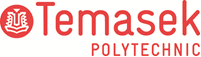

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Nuh Fikri (2404581G)
* Tutorial Group                :  P06
* Tutor						    :  Emile Sabastian
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [3]:
## Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Business Understanding
Goal: To develop a high-accuracy predictive model for early stroke detection, serving as the technical backend for a health-tech startup. The objective is to minimize false negatives to ensure at-risk individuals receive timely medical intervention.

Stroke is a leading cause of global disability, but many risk factors are asymptomatic. Current diagnostic methods may not be accessible to everyone. This project aims to build a machine learning tool that uses common health metrics (age, BMI, glucose) to predict stroke risk, providing a scalable solution for early health screening.

# 2. Data Understanding

## 2.1 Load dataset

In [4]:
## Read *.csv file into pandas DataFrame
FILE_PATH= "healthcare-dataset-stroke-data.csv"
sheet_name='healthcare-dataset-stroke-data'
# load data
df = pd.read_csv(FILE_PATH)

df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

In [5]:
## Understand the type of variable for each column
## Understand type each column
df.info() ## Alt: df types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
## Check for missing data
## Check for missing data
df.isna().sum() ## alt: df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
## Describe data distribution
## Describe data distri
df.describe(include="all") #string & number

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

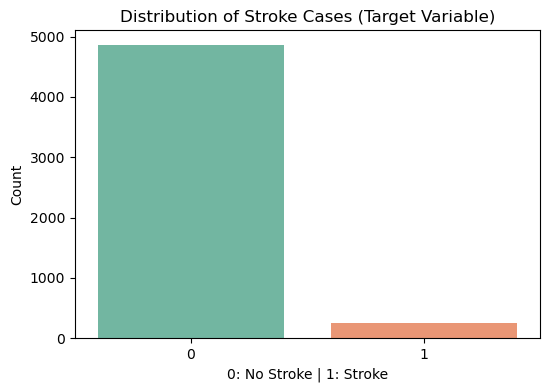

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [8]:
## Understanding distribution of target
# Check for target imbalance
plt.figure(figsize=(6, 4))
# Assigning x to hue and setting legend=False as suggested by the warning
sns.countplot(x='stroke', data=df, hue='stroke', palette='Set2', legend=False)
plt.title('Distribution of Stroke Cases (Target Variable)')
plt.xlabel('0: No Stroke | 1: Stroke')
plt.ylabel('Count')
plt.show()

# Print the percentage for your documentation
print(df['stroke'].value_counts(normalize=True) * 100)

### 2.3.1.2 Understanding distribution of features

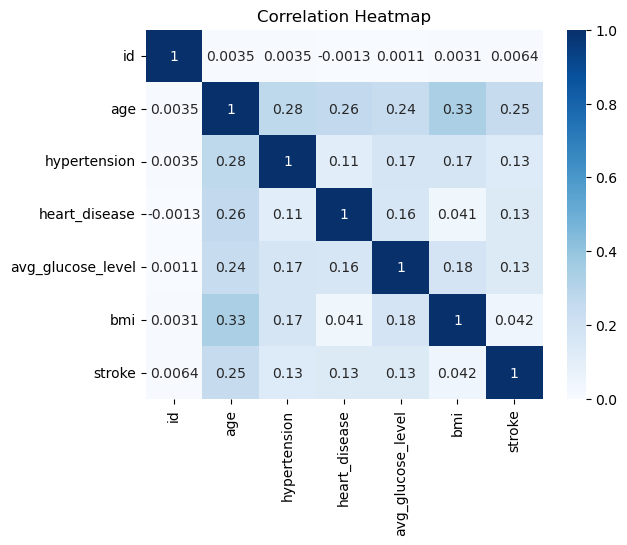

In [9]:
## Understanding distribution of features

# Correlation of numeric features
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### 2.3.2 Understanding relationship between variables

In [10]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
## Clean data

# Drop ID (Not useful for prediction)
df = df.drop('id', axis=1)

In [12]:
from sklearn.impute import SimpleImputer

# Handling Missing Values (BMI has ~201 missing rows)
# We use 'median' because BMI often has outliers.
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split data (80% Train, 20% Test) [cite: 172]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Rationale: Median is robust to BMI outliers 
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model
# --- EXPERIMENT 1: Baseline Model (Logistic Regression) ---
# Rationale: We start with a linear model to establish a performance baseline.
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

print("--- Baseline: Logistic Regression ---")
print(classification_report(y_test, y_pred_baseline))

In [ ]:
# --- EXPERIMENT 2: Advanced Model (Random Forest) ---
# Rationale: We try a non-linear ensemble model to see if it captures complex patterns better.
# 1. Define the Pipeline (Glueing the preprocessor and model together)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # This handles the 'Male' -> number conversion
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("--- Comparison: Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# 5. Model Evaluation

In [ ]:
## Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Generate the Classification Report
final_predictions = tune.predict(X_test)
print("--- Final Model: Tuned Random Forest Evaluation ---")
print(classification_report(y_test, final_predictions))

# 2. Create the Confusion Matrix Visualization
# This is a key "output/graph" for your documentation
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Final Model: Confusion Matrix')
plt.show()

# 3. Print Final Accuracy for reference
print(f"Final Accuracy: {accuracy_score(y_test, final_predictions):.2f}")

In [16]:
## New data

## Predict


## Iterative model development


In [17]:
## Further feature engineering / feature selection